In [2]:
import numpy as np
import os
import PIL
import pathlib
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import time

print("welcome")


welcome


In [12]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory('Neetpal/Splitted/train',
                                                                       shuffle=False,
                                                                       image_size=(224,224),
                                                                       batch_size=128,
                                                                        )


Found 3839 files belonging to 4 classes.


In [13]:
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory('Neetpal/Splitted/val',
                                                                      shuffle=False,
                                                                      image_size=(224,224),
                                                                       batch_size=128,
                                                                        )

Found 1279 files belonging to 4 classes.


In [14]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory("Neetpal/Splitted/test",
                                                          shuffle=False,
                                                          image_size=(224,224),
                                                          batch_size=128,
)

Found 1282 files belonging to 4 classes.


In [15]:
def visualize(direction):
    list_dir=os.listdir(direction)
    plt.figure(figsize=(14,8))
    for i in range(1,7):
        plt.subplot(2,3,i)
        img= plt.imread(os.path.join(direction,list_dir[i]))
        plt.imshow(img,cmap='gray')
        plt.axis('off')
    plt.tight_layout()

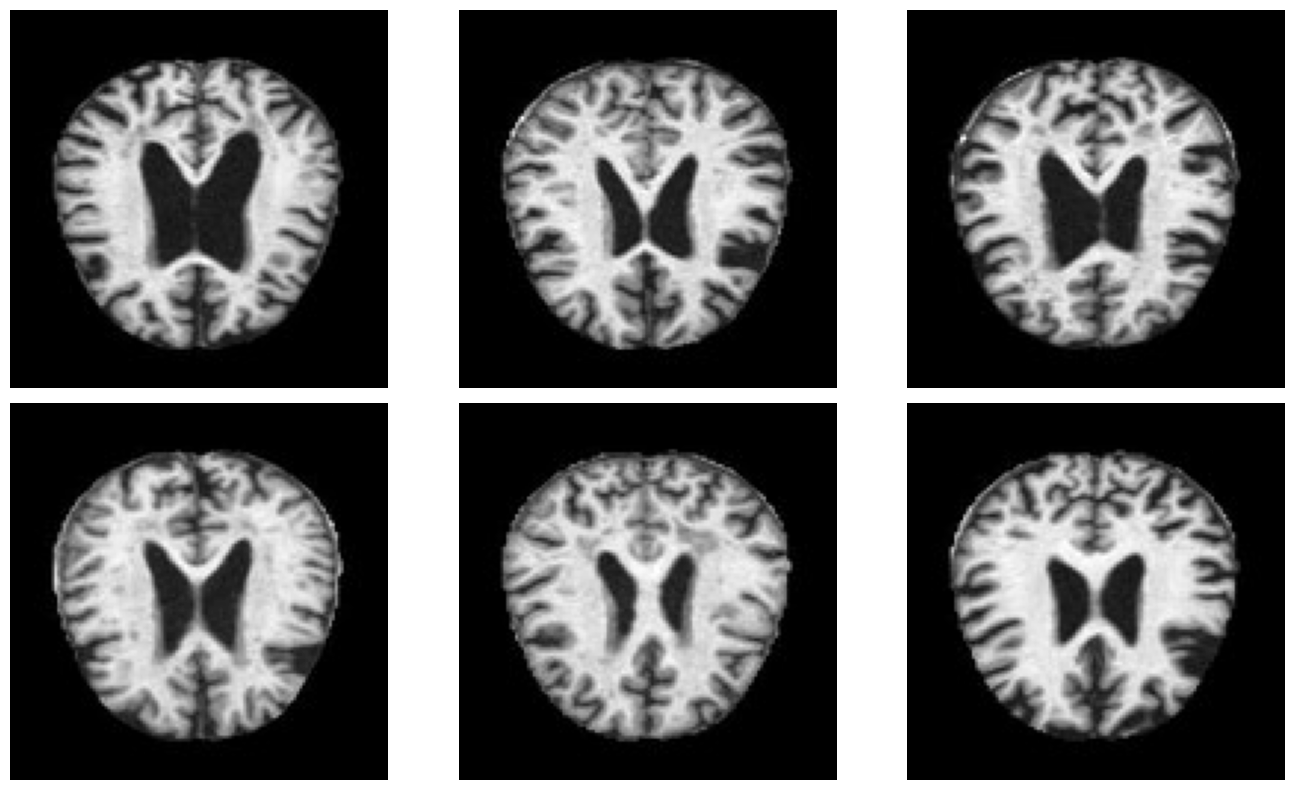

In [17]:
MildDemented = 'Neetpal/Splitted/test/Mild_demented'
visualize(MildDemented)

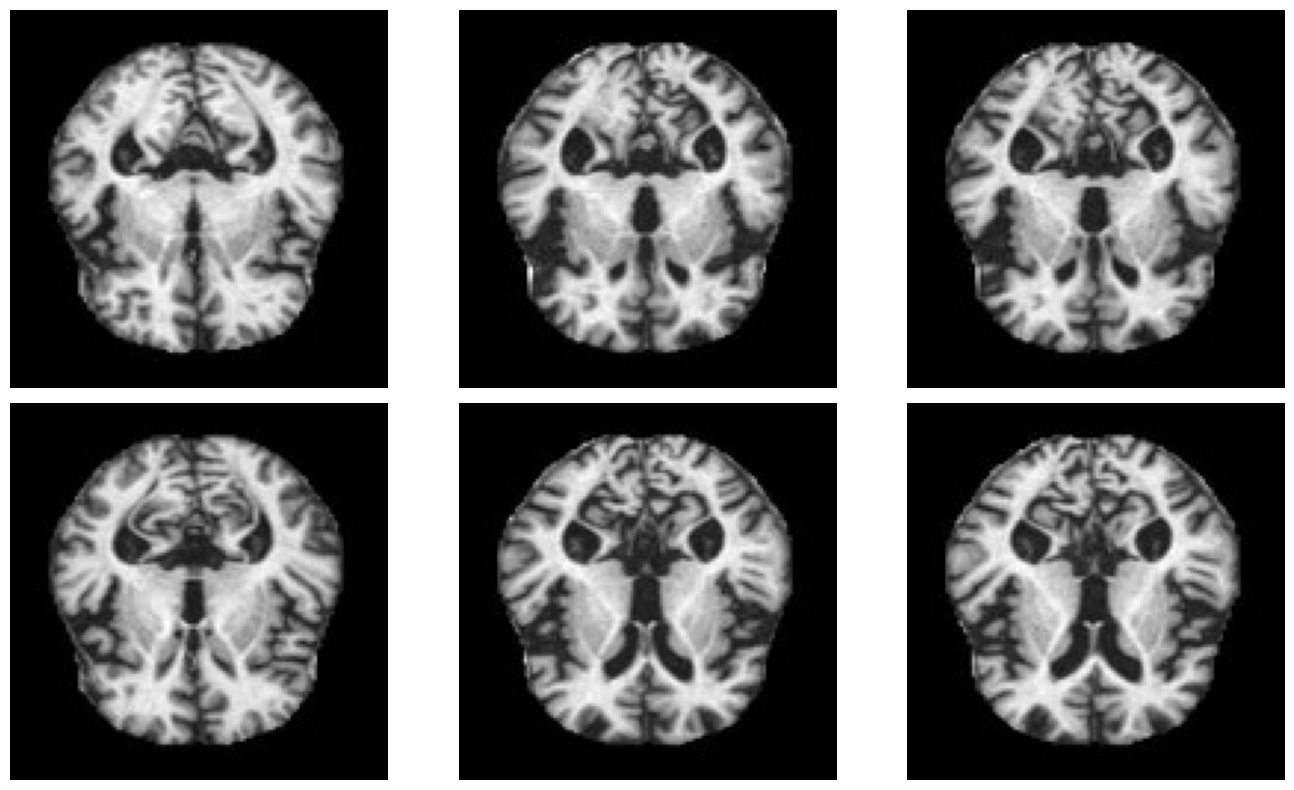

In [18]:
ModerateDemented = 'Neetpal/Splitted/test/Moderate_Demented'
visualize(ModerateDemented)

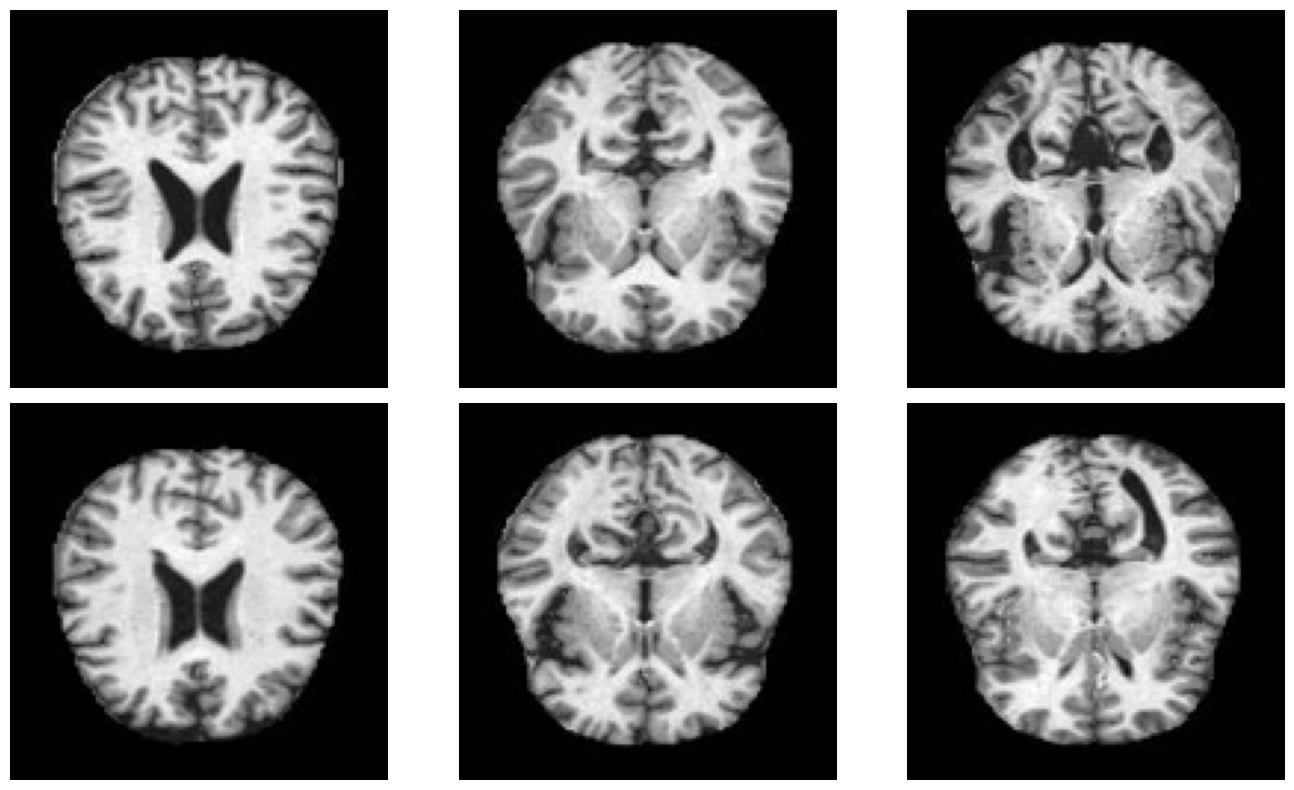

In [20]:
NonDemented = 'Neetpal/Splitted/test/Non_Demented'
visualize(NonDemented)

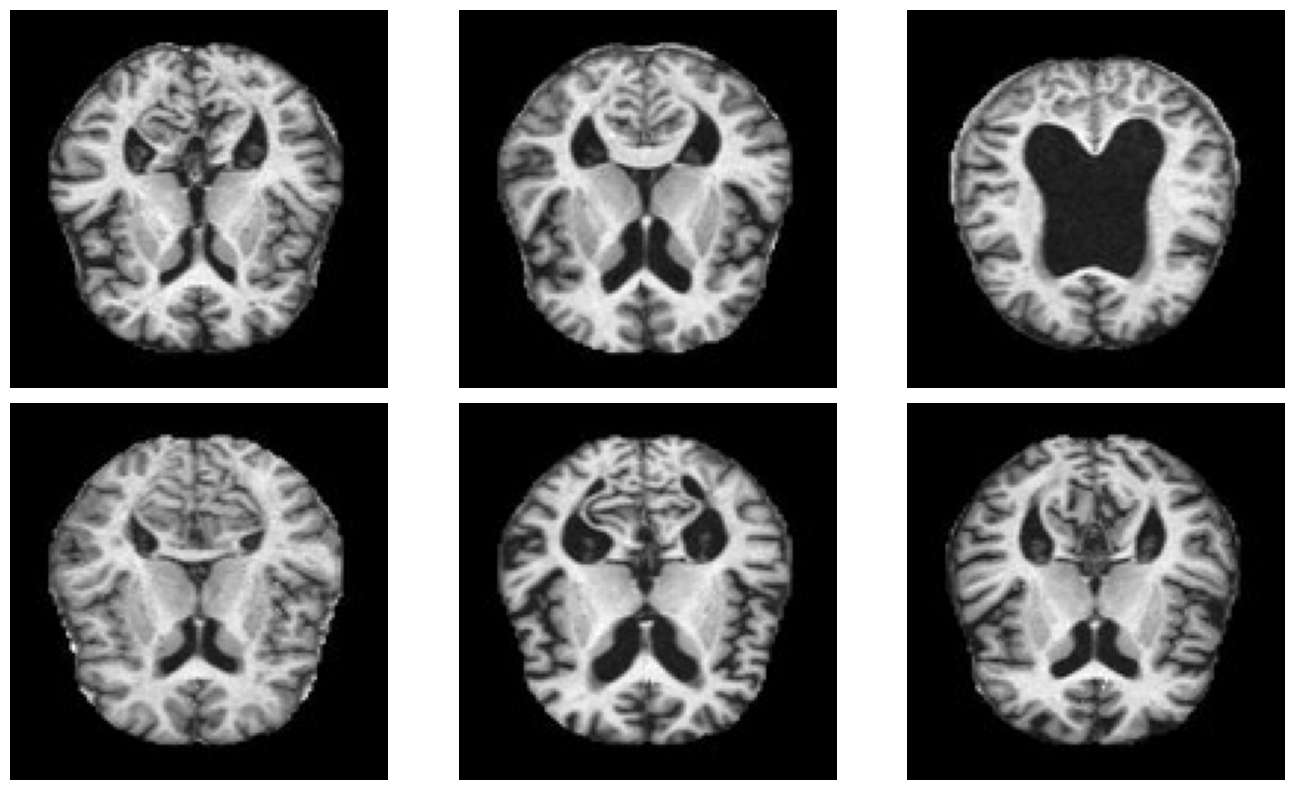

In [21]:
VeryMildDemented = 'Neetpal/Splitted/test/Very_Mild_Demented'
visualize(VeryMildDemented)

############################################################################################

In [27]:
import keras 
import keras.backend as k
from keras.models import Model
from keras.layers import Input , Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D,Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot
# from keras.utils.vis_utils import model_to_dot
from keras.optimizers import Adam ,SGD,RMSprop
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.models import Model



from time import time
import numpy as np

In [28]:
def fire_block(x, squeeze_filters, expand_filters):
    squeezed = Conv2D(filters=squeeze_filters,
                      kernel_size=1,
                      activation='relu')(x)
    expanded_1x1 = Conv2D(filters=expand_filters,
                        kernel_size=1,
                        activation='relu')(squeezed)
    expanded_3x3 = Conv2D(filters=expand_filters,
                        kernel_size=3,
                        padding='same',
                        activation='relu')(squeezed)

    output = Concatenate()([expanded_1x1, expanded_3x3])
    return output


input = Input([224, 224, 3])

x = Conv2D(96, 7, strides=2, padding='same', activation='relu')(input)
x = MaxPool2D(3, strides=2, padding='same')(x)


x = fire_block(x, squeeze_filters=16, expand_filters=64)
x = fire_block(x, squeeze_filters=16, expand_filters=64)
x = fire_block(x, squeeze_filters=32, expand_filters=128)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = fire_block(x, squeeze_filters=32, expand_filters=128)
x = fire_block(x, squeeze_filters=48, expand_filters=192)
x = fire_block(x, squeeze_filters=48, expand_filters=192)
x = fire_block(x, squeeze_filters=64, expand_filters=256)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = fire_block(x, squeeze_filters=64, expand_filters=256)


x = Conv2D(filters=1000, kernel_size=1)(x)
x = GlobalAvgPool2D()(x)

output = Activation('softmax')(x)

from tensorflow.keras import Model
model = Model(input, output)

In [29]:
model = tf.keras.Model(input, output)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │     14,208 │ input_layer[0][0] │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 56, 56,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 56,    │      1,552 │ max_pooling2d[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │      1,088 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 56, 56,    │      9,280 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 56, 56,    │          0 │ conv2d_2[0][0],   │
│ (Concatenate)       │ 128)              │            │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 56,    │      2,064 │ concatenate[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 56, 56,    │      1,088 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 56, 56,    │      9,280 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 56, 56,    │          0 │ conv2d_5[0][0],   │
│ (Concatenate)       │ 128)              │            │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 56, 56,    │      4,128 │ concatenate_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 56, 56,    │      4,224 │ conv2d_7[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 56, 56,    │     36,992 │ conv2d_7[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 56, 56,    │          0 │ conv2d_8[0][0],   │
│ (Concatenate)       │ 256)              │            │ conv2d_9[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 28, 28,    │          0 │ concatenate_2[0]… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 28, 28,    │      8,224 │ max_pooling2d_1[

 Total params: 1,248,424 (4.76 MB)

 Trainable params: 1,248,424 (4.76 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# learning_rate=10E-5

sgd = Adam(learning_rate=0.00001)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
 

In [36]:
# Define callbacks for early stopping and model checkpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

filepath = './best_weights.keras'  # Change file extension to .keras
# filepath = './best_weights.hdf6'

earlystopping = EarlyStopping(monitor = 'val_accuracy', 
                              mode = 'max' , 
                              patience = 15,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_accuracy', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [38]:
#Model Fit for SqueezeNet when lr = 10E-5

history01=model.fit(train_dataset,
                  validation_data=valid_dataset,
                  epochs = 10,
                  callbacks = callback_list,
                  verbose = 1)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.0761 - loss: 3.8236
Epoch 1: val_accuracy did not improve from 0.50039
30/30 ━━━━━━━━━━━━━━━━━━━━ 237s 8s/step - accuracy: 0.0849 - loss: 3.7755 - val_accuracy: 0.3503 - val_loss: 2.3417
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.0761 - loss: 2.6754 
Epoch 2: val_accuracy did not improve from 0.50039
30/30 ━━━━━━━━━━━━━━━━━━━━ 398s 13s/step - accuracy: 0.0849 - loss: 2.6482 - val_accuracy: 0.3503 - val_loss: 1.1406
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1103 - loss: 1.6208 
Epoch 3: val_accuracy did not improve from 0.50039
30/30 ━━━━━━━━━━━━━━━━━━━━ 402s 13s/step - accuracy: 0.1127 - loss: 1.6128 - val_accuracy: 0.5004 - val_loss: 1.0394
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1375 - loss: 1.4734 
Epoch 4: val_accuracy did not improve from 0.50039
30/30 ━━━━━━━━━━━━━━━━━━━━ 386s 13s/step - accuracy: 0.1400 - loss: 1.4640 - val_accuracy: 0.5004 - val_loss

In [39]:
#Predictions for SqueezeNet when lr = 10E-5

model_evaluate = model.evaluate(test_dataset)
print("Accuracy: %", "{:.2f}".format(model_evaluate[1]*100))
print("Loss: %", "{:.2f}".format(model_evaluate[0]*100))

11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.1315 - loss: 2.2411
Accuracy: % 34.95
Loss: % 179.23


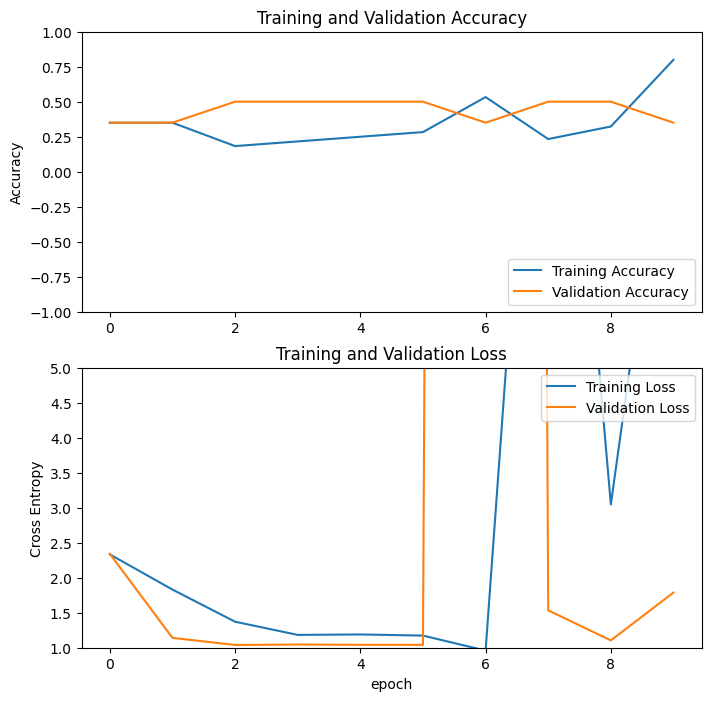

In [40]:
#Plot The Result for SqueezeNet when lr = 10E-5

acc = history01.history['accuracy']
val_acc = history01.history['val_accuracy']

loss = history01.history['loss']
val_loss = history01.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([-1,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([1,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()